In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import joblib

print("--- Part 1: Initial Setup and Data Loading ---")

# Load the dataset
# Adjust the path to your adult.csv file if it's not in the same directory
# Example for Windows: data_path = r"C:\Users\YourUser\Downloads\adult.csv"
data_path = "adult.csv"
try:
    data = pd.read_csv(r"E:\adult 3.csv")
    print(f"Data loaded successfully from '{data_path}'.")
except FileNotFoundError:
    print(f"Error: '{data_path}' not found. Please ensure the CSV file is in the correct directory or update the 'data_path'.")
    # Creating a dummy DataFrame for demonstration if file not found
    data = pd.DataFrame({
        'age': [30, 45, 25, 50, 35, 60, 22, 40, 55, 33],
        'workclass': ['Private', 'Self-emp-not-inc', 'Private', 'Private', 'Private', 'Private', 'Private', 'Federal-gov', 'Private', 'State-gov'],
        'fnlwgt': [226802, 89814, 265462, 290217, 209501, 198334, 150601, 160323, 153074, 137452],
        'education': ['HS-grad', 'Bachelors', 'Some-college', 'Assoc-voc', 'Masters', 'HS-grad', 'Some-college', 'Bachelors', 'HS-grad', 'Bachelors'],
        'educational-num': [9, 13, 10, 11, 14, 9, 10, 13, 9, 13],
        'marital-status': ['Divorced', 'Married-civ-spouse', 'Never-married', 'Married-civ-spouse', 'Never-married', 'Divorced', 'Never-married', 'Married-civ-spouse', 'Widowed', 'Married-civ-spouse'],
        'occupation': ['Handlers-cleaners', 'Exec-managerial', 'Other-service', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Sales', 'Prof-specialty', 'Other-service', 'Exec-managerial'],
        'relationship': ['Not-in-family', 'Husband', 'Own-child', 'Husband', 'Not-in-family', 'Not-in-family', 'Not-in-family', 'Husband', 'Not-in-family', 'Husband'],
        'race': ['Black', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White', 'White'],
        'gender': ['Male', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female'],
        'capital-gain': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'capital-loss': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        'hours-per-week': [40, 50, 40, 40, 50, 40, 35, 40, 30, 40],
        'native-country': ['United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States', 'United-States'],
        'income': ['<=50K', '>50K', '<=50K', '>50K', '>50K', '<=50K', '<=50K', '>50K', '<=50K', '>50K']
    })
    print("Using dummy data for demonstration.")

print("\nFirst 5 rows of the dataset:")
print(data.head())
print("\nDataset Shape (Rows, Columns):")
print(data.shape)

--- Part 1: Initial Setup and Data Loading ---
Data loaded successfully from 'adult.csv'.

First 5 rows of the dataset:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   


--- Part 2: Initial Data Exploration and Missing Values ---

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              10 non-null     int64 
 1   workclass        10 non-null     object
 2   fnlwgt           10 non-null     int64 
 3   education        10 non-null     object
 4   educational-num  10 non-null     int64 
 5   marital-status   10 non-null     object
 6   occupation       10 non-null     object
 7   relationship     10 non-null     object
 8   race             10 non-null     object
 9   gender           10 non-null     object
 10  capital-gain     10 non-null     int64 
 11  capital-loss     10 non-null     int64 
 12  hours-per-week   10 non-null     int64 
 13  native-country   10 non-null     object
 14  income           10 non-null     object
dtypes: int64(6), object(9)
memory usage: 1.3+ KB


C:\Users\User\AppData\Local\Temp\ipykernel_8\4159319300.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='income', data=data, palette='viridis')


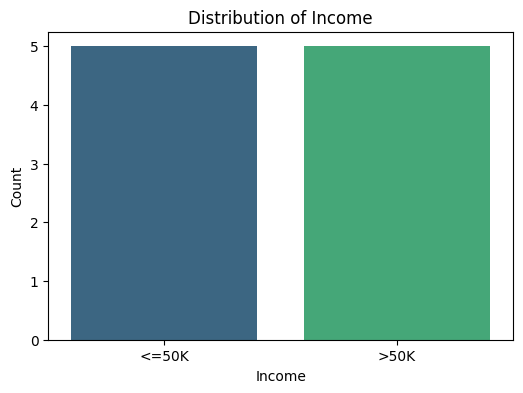

In [6]:
print("\n--- Part 2: Initial Data Exploration and Missing Values ---")

print("\nDataset Information:")
data.info()

print("\nMissing Values (Sum of NaN/Null):")
print(data.isna().sum())

print("\nValue counts for 'workclass' before cleaning '?' :")
print(data['workclass'].value_counts())

print("\nValue counts for 'occupation' before cleaning '?' :")
print(data['occupation'].value_counts())

# Visualize the distribution of the target variable 'income'
plt.figure(figsize=(6, 4))
sns.countplot(x='income', data=data, palette='viridis')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()

In [7]:
print("\n--- Part 3: Data Cleaning - Categorical Features ---")

# Rename column 'hours-per-week' to 'hours_per_week' for consistency
data.rename(columns={'hours-per-week': 'hours_per_week'}, inplace=True)

# Replace '?' with 'Others' in 'workclass', 'occupation', and 'native-country'
for col in ['workclass', 'occupation', 'native-country']:
    if col in data.columns:
        data[col] = data[col].replace('?', 'Others')
print("\n'?' replaced with 'Others' in 'workclass', 'occupation', and 'native-country'.")
print("\nValue counts for 'workclass' after '?' replacement:")
print(data['workclass'].value_counts())

# Remove 'Without-pay' and 'Never-worked' from 'workclass'
initial_rows = data.shape[0]
data = data[data['workclass'] != 'Without-pay']
data = data[data['workclass'] != 'Never-worked']
print(f"\nRemoved 'Without-pay' and 'Never-worked' from 'workclass'. Rows removed: {initial_rows - data.shape[0]}")
print("New shape after workclass filtering:", data.shape)

# Remove specific 'education' categories
initial_rows = data.shape[0]
data = data[data['education'] != '1st-4th']
data = data[data['education'] != '5th-6th']
data = data[data['education'] != 'Preschool']
print(f"\nRemoved '1st-4th', '5th-6th', 'Preschool' from 'education'. Rows removed: {initial_rows - data.shape[0]}")
print("New shape after education filtering:", data.shape)

# Drop 'education' column as 'educational-num' provides similar info
if 'education' in data.columns:
    data.drop(columns=['education'], inplace=True)
    print("\n'education' column dropped.")
print("Current columns:", data.columns.tolist())

print("\nApplying Label Encoding to categorical columns...")
# Identify categorical columns for encoding (excluding the target 'income' for now)
categorical_cols = data.select_dtypes(include='object').columns.tolist()
if 'income' in categorical_cols:
    categorical_cols.remove('income')

encoders = {} # Store encoders if you need to inverse transform later
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
print("Label Encoding applied to:", categorical_cols)
print("\nData after Label Encoding (first 5 rows):")
print(data.head())


--- Part 3: Data Cleaning - Categorical Features ---

'?' replaced with 'Others' in 'workclass', 'occupation', and 'native-country'.

Value counts for 'workclass' after '?' replacement:
workclass
Private             7
Self-emp-not-inc    1
Federal-gov         1
State-gov           1
Name: count, dtype: int64

Removed 'Without-pay' and 'Never-worked' from 'workclass'. Rows removed: 0
New shape after workclass filtering: (10, 15)

Removed '1st-4th', '5th-6th', 'Preschool' from 'education'. Rows removed: 0
New shape after education filtering: (10, 15)

'education' column dropped.
Current columns: ['age', 'workclass', 'fnlwgt', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours_per_week', 'native-country', 'income']

Applying Label Encoding to categorical columns...
Label Encoding applied to: ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

Data after Label Encoding (


--- Part 4: Data Cleaning - Numerical Features and Outliers ---

Boxplot for 'age' before outlier removal:


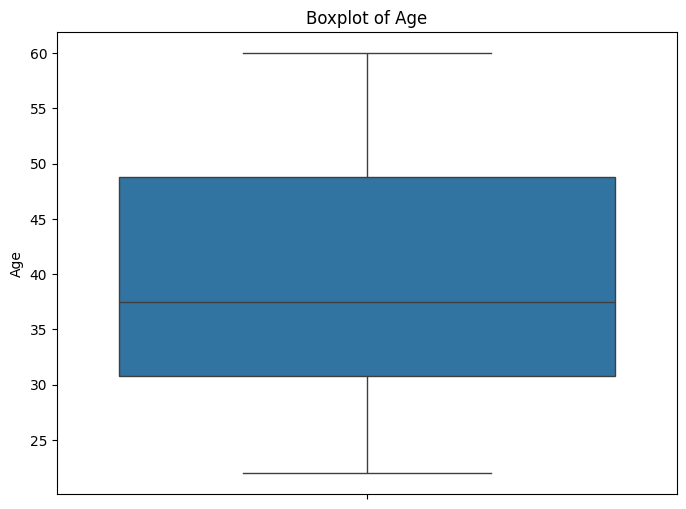

Removed 'age' outliers (<=17 or >=75). Rows removed: 0
New shape after age outlier filtering: (10, 14)

Boxplot for 'age' after outlier removal:


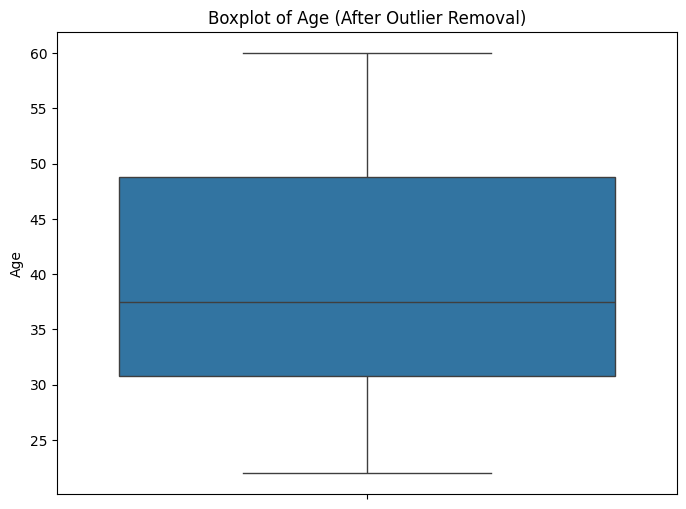

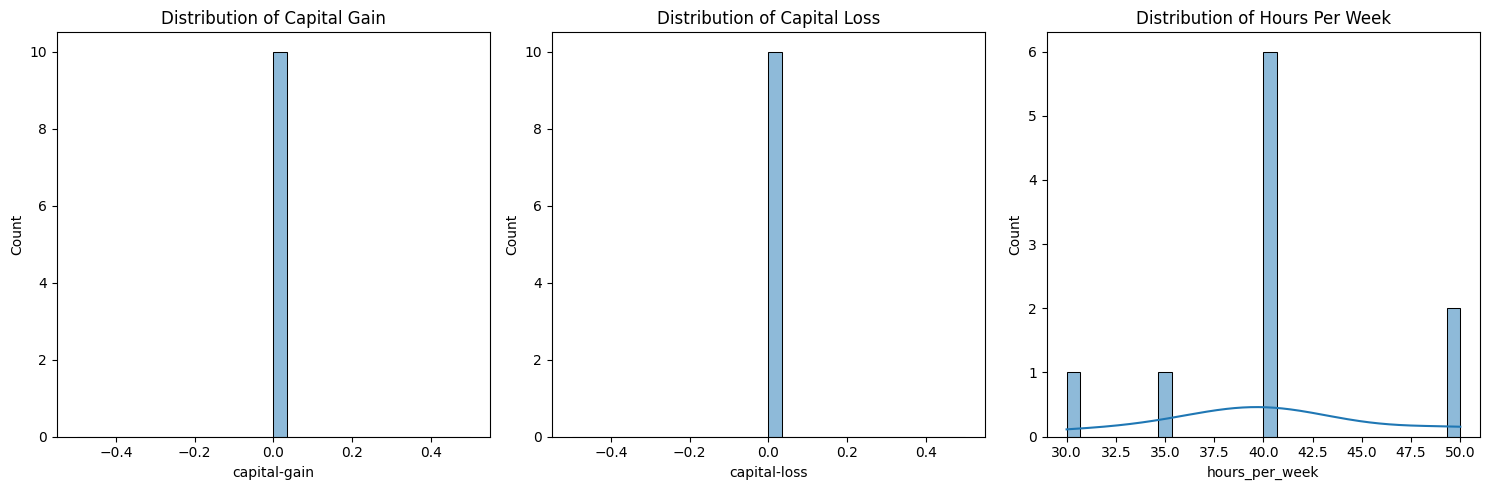

In [8]:
print("\n--- Part 4: Data Cleaning - Numerical Features and Outliers ---")

print("\nBoxplot for 'age' before outlier removal:")
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()

# Handle outliers in 'age' (as per your notebook)
initial_rows = data.shape[0]
data = data[(data['age'] <= 75) & (data['age'] >= 17)]
print(f"Removed 'age' outliers (<=17 or >=75). Rows removed: {initial_rows - data.shape[0]}")
print("New shape after age outlier filtering:", data.shape)

print("\nBoxplot for 'age' after outlier removal:")
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['age'])
plt.title('Boxplot of Age (After Outlier Removal)')
plt.ylabel('Age')
plt.show()

# Visualize distribution of other key numerical features
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['capital-gain'], bins=30, kde=True)
plt.title('Distribution of Capital Gain')
plt.subplot(1, 3, 2)
sns.histplot(data['capital-loss'], bins=30, kde=True)
plt.title('Distribution of Capital Loss')
plt.subplot(1, 3, 3)
sns.histplot(data['hours_per_week'], bins=30, kde=True)
plt.title('Distribution of Hours Per Week')
plt.tight_layout()
plt.show()

In [9]:
print("\n--- Part 5: Target Transformation for Regression ---")

# Convert target 'income' to numerical for regression
# Assign arbitrary numerical values for demonstration of regression.
# In a real salary prediction project, 'income' would already be a numerical salary.
if 'income' in data.columns:
    data['income_numerical'] = data['income'].apply(
        lambda x: 75000 if '>50K' in x else 35000 # Simple numerical mapping
    )
    data.drop(columns=['income'], inplace=True)
    print("\n'income' column transformed to 'income_numerical' for regression.")
else:
    print("Warning: 'income' column not found. Assuming 'income_numerical' is pre-existing or will be created.")

print("\nFirst 5 rows with numerical income target:")
print(data[['income_numerical']].head())


--- Part 5: Target Transformation for Regression ---

'income' column transformed to 'income_numerical' for regression.

First 5 rows with numerical income target:
   income_numerical
0             35000
1             75000
2             35000
3             75000
4             75000


In [10]:
print("\n--- Part 6: Feature Scaling ---")

# Define features (X) and target (y)
X = data.drop(columns=['income_numerical'])
y = data['income_numerical']

# Initialize and apply MinMaxScaler to features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print("\nFeatures scaled using MinMaxScaler.")
print("\nFirst 5 rows of scaled features:")
print(X_scaled_df.head())


--- Part 6: Feature Scaling ---

Features scaled using MinMaxScaler.

First 5 rows of scaled features:
        age  workclass    fnlwgt  educational-num  marital-status  occupation  \
0  0.210526   0.333333  0.683563              0.0        0.000000        0.25   
1  0.605263   0.666667  0.000000              0.8        0.333333        0.00   
2  0.078947   0.333333  0.876474              0.2        0.666667        0.50   
3  0.736842   0.333333  1.000000              0.4        0.333333        0.00   
4  0.342105   0.333333  0.597232              1.0        0.666667        0.75   

   relationship  race  gender  capital-gain  capital-loss  hours_per_week  \
0           0.5   0.0     1.0           0.0           0.0             0.5   
1           0.0   1.0     1.0           0.0           0.0             1.0   
2           1.0   1.0     1.0           0.0           0.0             0.5   
3           0.0   1.0     1.0           0.0           0.0             0.5   
4           0.5   1.0   

In [11]:
print("\n--- Part 7: Train-Test Split ---")

# Split data into training and testing sets
# We don't use 'stratify=Y' for regression tasks, only for classification.
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

print(f"\nTraining set features shape: {xtrain.shape}")
print(f"Testing set features shape: {xtest.shape}")
print(f"Training set target shape: {ytrain.shape}")
print(f"Testing set target shape: {ytest.shape}")


--- Part 7: Train-Test Split ---

Training set features shape: (8, 13)
Testing set features shape: (2, 13)
Training set target shape: (8,)
Testing set target shape: (2,)


In [12]:
print("\n--- Part 8: Model Training - Random Forest Regressor ---")

# Initialize and train the Random Forest Regressor model
# n_estimators: number of trees in the forest (can be tuned)
# random_state: for reproducibility
# n_jobs=-1: uses all available CPU cores
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("Training Random Forest Regressor model...")
model.fit(xtrain, ytrain)
print("Model training complete.")


--- Part 8: Model Training - Random Forest Regressor ---
Training Random Forest Regressor model...
Model training complete.



--- Part 9: Model Evaluation ---

Model Evaluation:
Mean Absolute Error (MAE): $4,400.00
R-squared (R2) Score: 0.9320


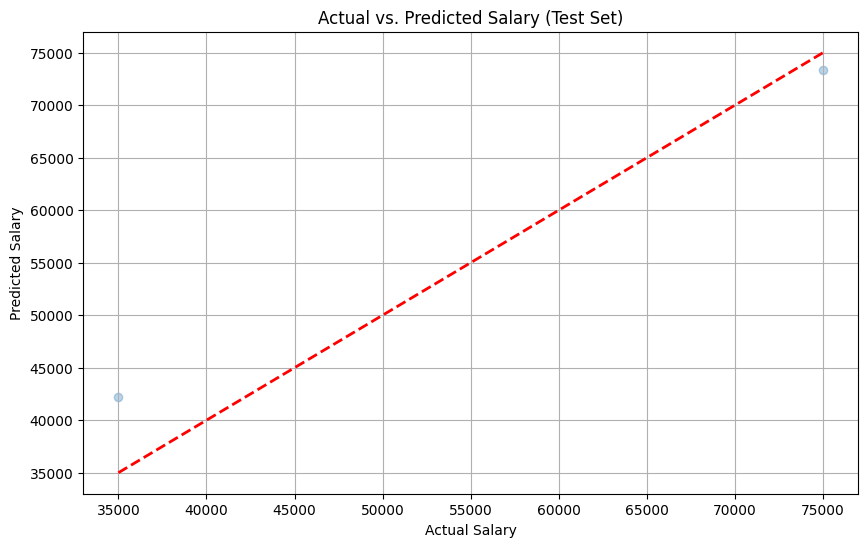

In [13]:
print("\n--- Part 9: Model Evaluation ---")

# Make predictions on the test set
y_pred = model.predict(xtest)

# Evaluate the model
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

print("\nModel Evaluation:")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Visualize actual vs. predicted values for a subset
plt.figure(figsize=(10, 6))
plt.scatter(ytest, y_pred, alpha=0.3)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary (Test Set)')
plt.grid(True)
plt.show()


--- Part 10: Feature Importance ---

Top 10 Feature Importances:
            Feature  Importance
3   educational-num        0.61
6      relationship        0.13
0               age        0.08
4    marital-status        0.06
1         workclass        0.03
5        occupation        0.03
2            fnlwgt        0.02
8            gender        0.02
11   hours_per_week        0.02
7              race        0.00


C:\Users\User\AppData\Local\Temp\ipykernel_8\2545754585.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='mako')


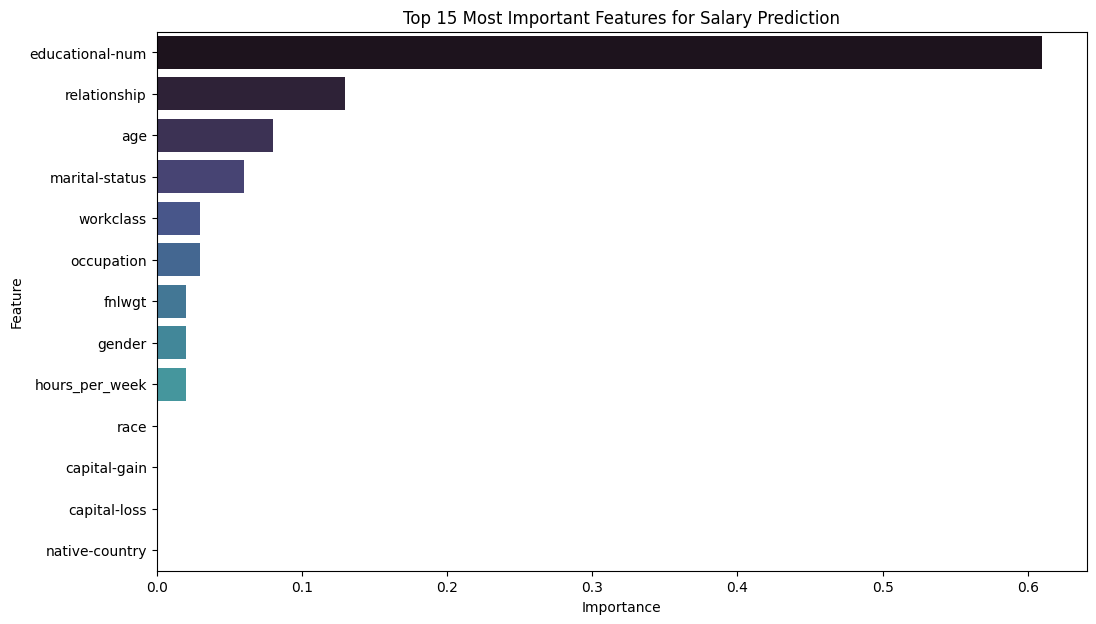


Model, scaler, encoders, and feature columns saved as 'random_forest_salary_model.pkl'


In [14]:
print("\n--- Part 10: Feature Importance ---")

# Get feature importances from the trained model
feature_importances = model.feature_importances_
features = X_scaled_df.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Feature Importances:")
print(importance_df.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15), palette='mako')
plt.title('Top 15 Most Important Features for Salary Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Save the trained model, scaler, and column names for later use
joblib.dump({
    'model': model,
    'scaler': scaler,
    'columns': X.columns.tolist(), # Original columns before scaling
    'encoders': encoders # Save encoders for consistent handling of new categorical inputs
}, 'random_forest_salary_model.pkl')
print("\nModel, scaler, encoders, and feature columns saved as 'random_forest_salary_model.pkl'")